In [1]:
# ==========================
# Python Analysis for Manufacturing Dataset
# Using pandas, seaborn, matplotlib
# ==========================

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [3]:
# --------------------------
# Load Dataset
# --------------------------
df = pd.read_csv('manufacturing_dataset.csv')

# Create folder to save plots
os.makedirs('plots', exist_ok=True)

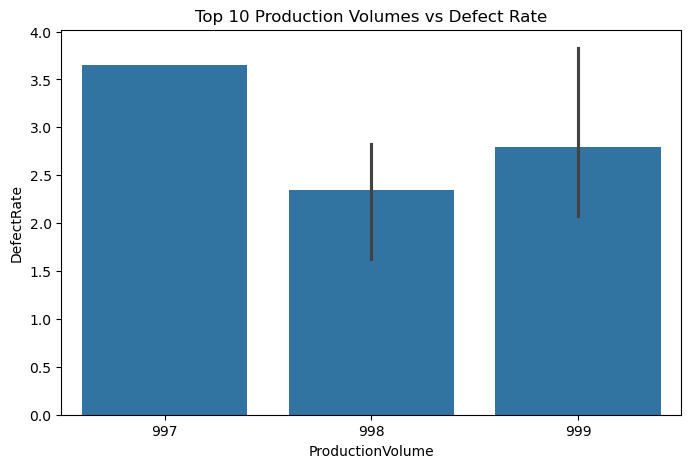

In [4]:
# --------------------------
# 1. Top Production Volumes vs Defect Rate
# --------------------------
top_prod = df.nlargest(10, 'ProductionVolume')
plt.figure(figsize=(8,5))
sns.barplot(data=top_prod, x='ProductionVolume', y='DefectRate')
plt.title('Top 10 Production Volumes vs Defect Rate')
plt.savefig('plots/01_top_production_defects.png')
plt.show()

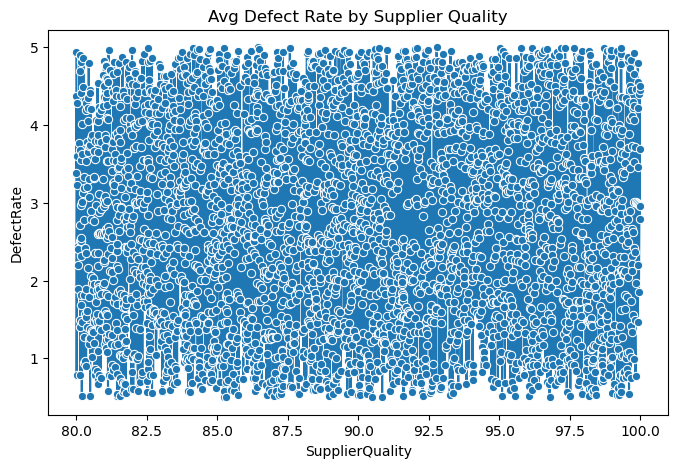

In [5]:
# --------------------------
# 2. Average Defect Rate per Supplier Quality
# --------------------------
supplier_defect = df.groupby('SupplierQuality')['DefectRate'].mean().reset_index()
plt.figure(figsize=(8,5))
sns.lineplot(data=supplier_defect, x='SupplierQuality', y='DefectRate', marker='o')
plt.title('Avg Defect Rate by Supplier Quality')
plt.savefig('plots/02_supplier_defect.png')
plt.show()

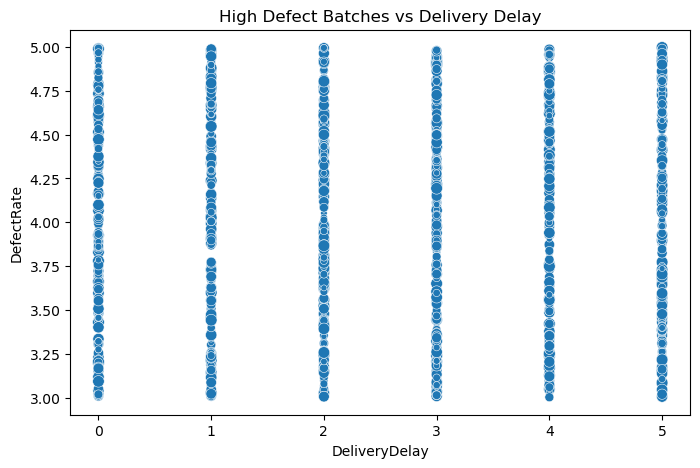

In [6]:
# --------------------------
# 3. High Defect Batches with Delivery Delay
# --------------------------
high_defect_delay = df[df['DefectRate'] > 3]
plt.figure(figsize=(8,5))
sns.scatterplot(data=high_defect_delay, x='DeliveryDelay', y='DefectRate', size='ProductionVolume', legend=False)
plt.title('High Defect Batches vs Delivery Delay')
plt.savefig('plots/03_high_defect_delivery.png')
plt.show()

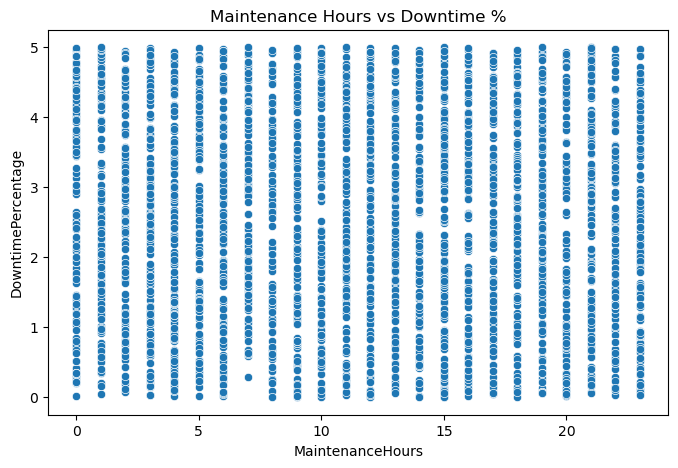

In [7]:
# --------------------------
# 4. Maintenance vs Downtime
# --------------------------
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='MaintenanceHours', y='DowntimePercentage')
plt.title('Maintenance Hours vs Downtime %')
plt.savefig('plots/04_maintenance_downtime.png')
plt.show()

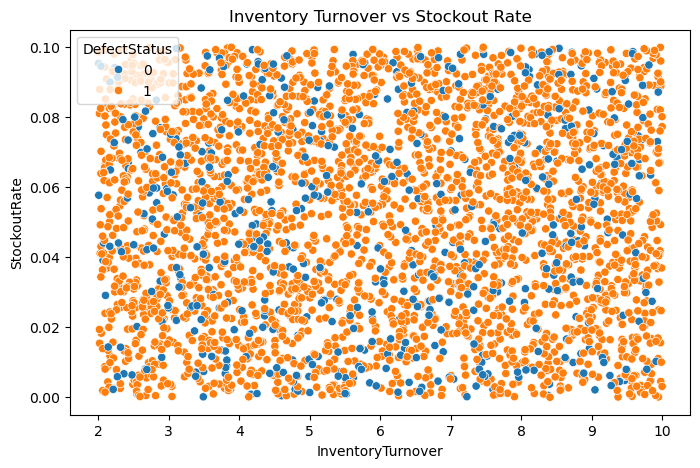

In [8]:
# --------------------------
# 5. Inventory Turnover vs Stockout Rate
# --------------------------
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='InventoryTurnover', y='StockoutRate', hue='DefectStatus')
plt.title('Inventory Turnover vs Stockout Rate')
plt.savefig('plots/05_inventory_stockout.png')
plt.show()

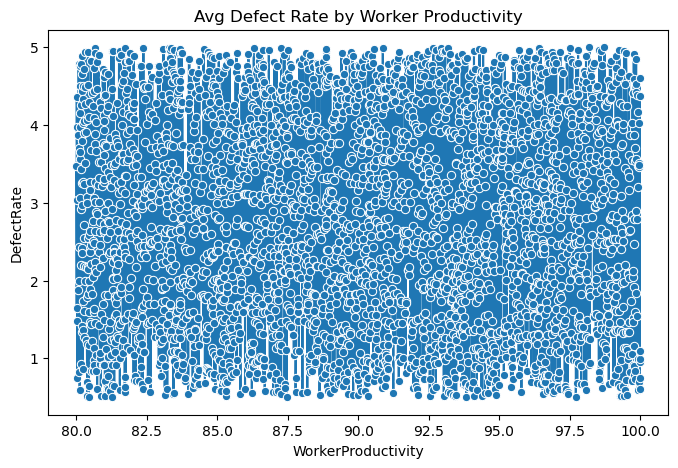

In [9]:
# --------------------------
# 6. Workforce Productivity Impact
# --------------------------
worker_defect = df.groupby('WorkerProductivity')['DefectRate'].mean().reset_index()
plt.figure(figsize=(8,5))
sns.lineplot(data=worker_defect, x='WorkerProductivity', y='DefectRate', marker='o')
plt.title('Avg Defect Rate by Worker Productivity')
plt.savefig('plots/06_worker_defect.png')
plt.show()

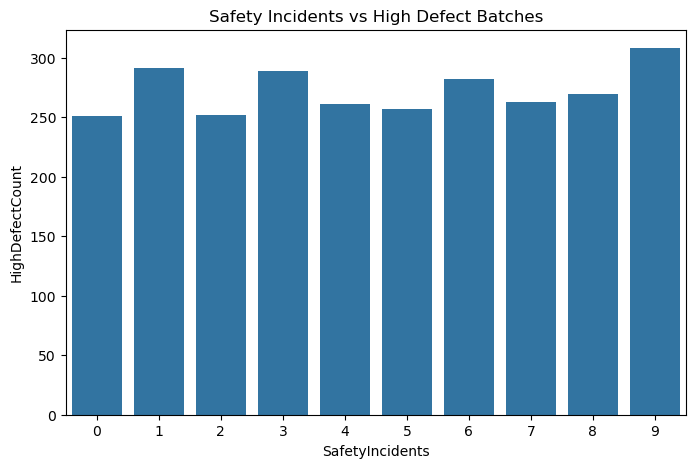

In [10]:
# --------------------------
# 7. Safety Incidents vs High Defect Count
# --------------------------
safety_defect = df[df['DefectStatus']==1].groupby('SafetyIncidents').size().reset_index(name='HighDefectCount')
plt.figure(figsize=(8,5))
sns.barplot(data=safety_defect, x='SafetyIncidents', y='HighDefectCount')
plt.title('Safety Incidents vs High Defect Batches')
plt.savefig('plots/07_safety_defect.png')
plt.show()

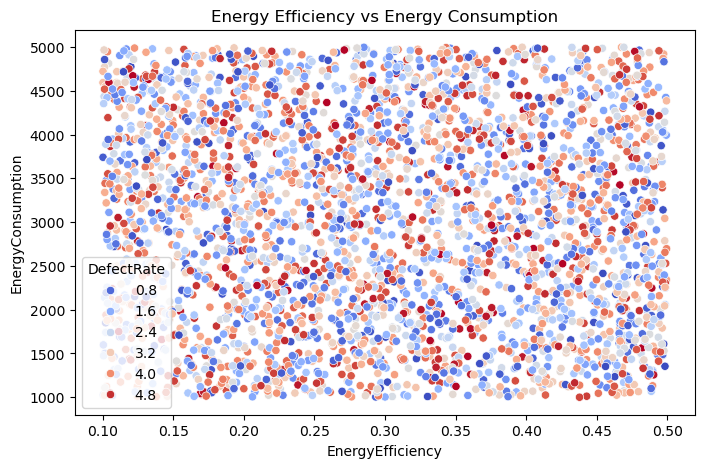

In [11]:
# --------------------------
# 8. Energy Efficiency vs Energy Consumption
# --------------------------
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='EnergyEfficiency', y='EnergyConsumption', hue='DefectRate', palette='coolwarm')
plt.title('Energy Efficiency vs Energy Consumption')
plt.savefig('plots/08_energy_efficiency.png')
plt.show()

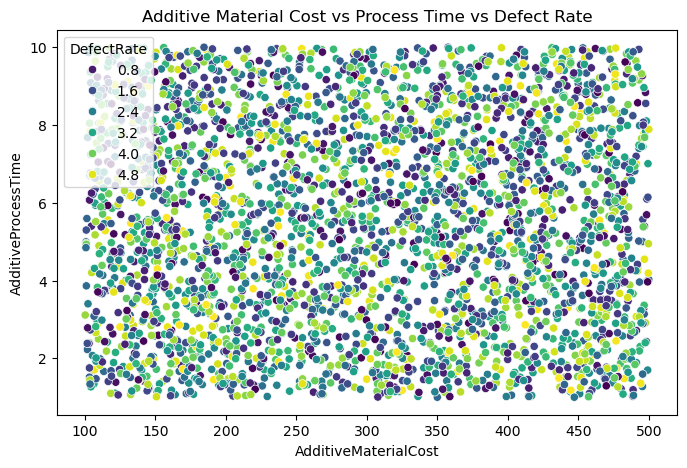

In [12]:
# --------------------------
# 9. Additive Manufacturing Cost vs Process Time vs Defect
# --------------------------
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='AdditiveMaterialCost', y='AdditiveProcessTime', hue='DefectRate', palette='viridis')
plt.title('Additive Material Cost vs Process Time vs Defect Rate')
plt.savefig('plots/09_additive_cost_time.png')
plt.show()

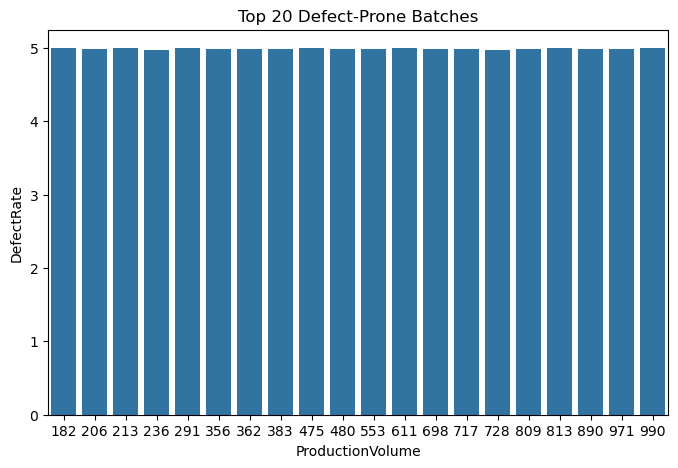

In [13]:
# --------------------------
# 10. Top Defect-Prone Batches
# --------------------------
top_defect = df.nlargest(20, 'DefectRate')
plt.figure(figsize=(8,5))
sns.barplot(data=top_defect, x='ProductionVolume', y='DefectRate')
plt.title('Top 20 Defect-Prone Batches')
plt.savefig('plots/10_top_defect_batches.png')
plt.show()

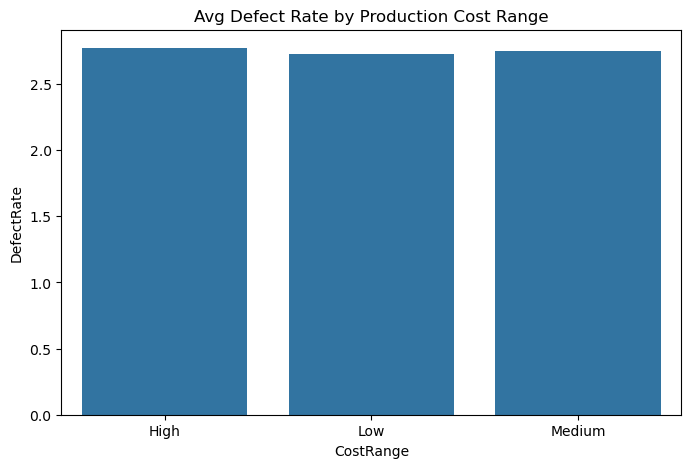

In [14]:
# --------------------------
# 11. Defect Rate by Production Cost Range
# --------------------------
def cost_range(x):
    if x < 10000:
        return 'Low'
    elif x <= 15000:
        return 'Medium'
    else:
        return 'High'
df['CostRange'] = df['ProductionCost'].apply(cost_range)
cost_defect = df.groupby('CostRange')['DefectRate'].mean().reset_index()
plt.figure(figsize=(8,5))
sns.barplot(data=cost_defect, x='CostRange', y='DefectRate')
plt.title('Avg Defect Rate by Production Cost Range')
plt.savefig('plots/11_cost_defect.png')
plt.show()

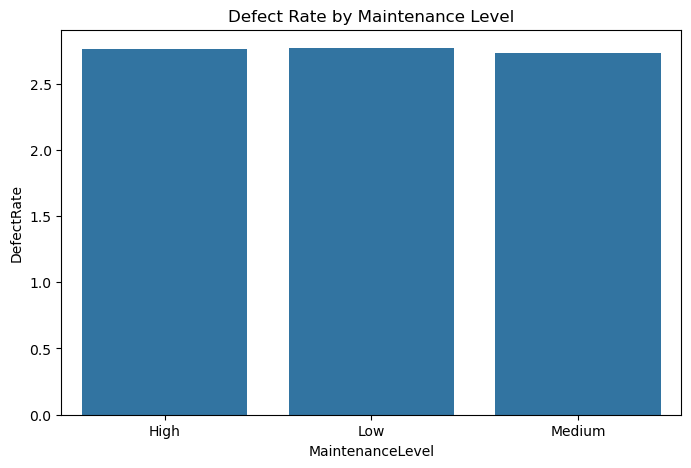

In [15]:

# --------------------------
# 12. Maintenance Level vs Defect Rate
# --------------------------
def maintenance_level(x):
    if x < 5:
        return 'Low'
    elif x <= 15:
        return 'Medium'
    else:
        return 'High'
df['MaintenanceLevel'] = df['MaintenanceHours'].apply(maintenance_level)
maint_defect = df.groupby('MaintenanceLevel')['DefectRate'].mean().reset_index()
plt.figure(figsize=(8,5))
sns.barplot(data=maint_defect, x='MaintenanceLevel', y='DefectRate')
plt.title('Defect Rate by Maintenance Level')
plt.savefig('plots/12_maintenance_defect.png')
plt.show()

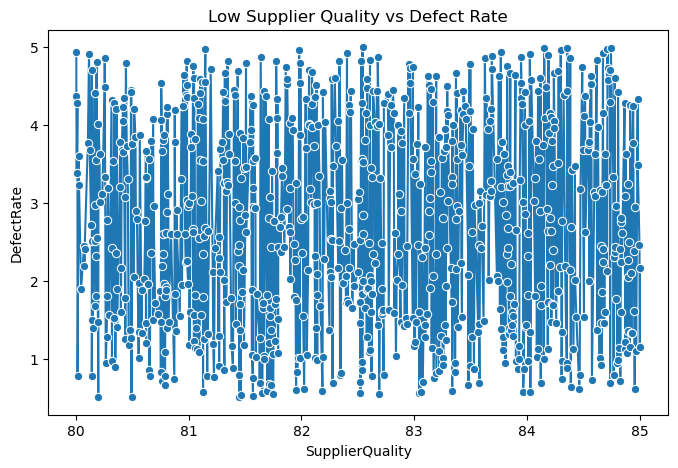

In [16]:
# --------------------------
# 13. Low Supplier Quality vs High Defect
# --------------------------
low_supplier = df[df['SupplierQuality']<85]
low_supplier_defect = low_supplier.groupby('SupplierQuality')['DefectRate'].mean().reset_index()
plt.figure(figsize=(8,5))
sns.lineplot(data=low_supplier_defect, x='SupplierQuality', y='DefectRate', marker='o')
plt.title('Low Supplier Quality vs Defect Rate')
plt.savefig('plots/13_low_supplier_defect.png')
plt.show()

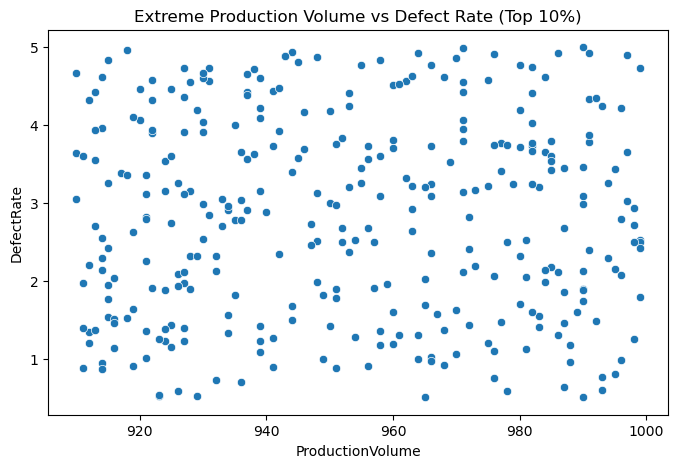

In [17]:
# --------------------------
# 14. Extreme Production Volume (Top 10%)
# --------------------------
threshold = df['ProductionVolume'].quantile(0.9)
extreme_prod = df[df['ProductionVolume']>=threshold]
plt.figure(figsize=(8,5))
sns.scatterplot(data=extreme_prod, x='ProductionVolume', y='DefectRate')
plt.title('Extreme Production Volume vs Defect Rate (Top 10%)')
plt.savefig('plots/14_extreme_production.png')
plt.show()

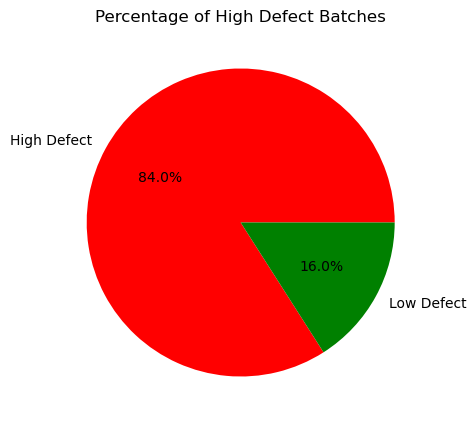

In [18]:
# --------------------------
# 15. Percentage of High Defect Batches
# --------------------------
high_defect_pct = df['DefectStatus'].sum()/len(df)*100
plt.figure(figsize=(5,5))
plt.pie([high_defect_pct, 100-high_defect_pct], labels=['High Defect', 'Low Defect'], autopct='%1.1f%%', colors=['red','green'])
plt.title('Percentage of High Defect Batches')
plt.savefig('plots/15_high_defect_pct.png')
plt.show()

C:\Users\Ismail\AppData\Local\Temp\ipykernel_8596\3912680067.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  energy_quartile = df.groupby('EnergyQuartile')['DefectRate'].mean().reset_index()


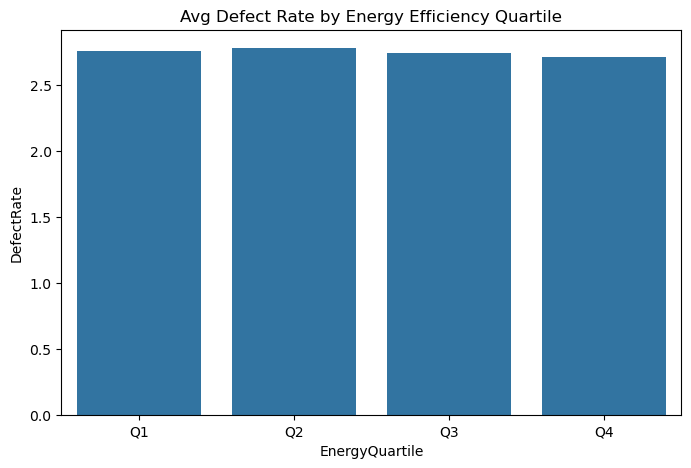

In [19]:
# --------------------------
# 16. Energy Efficiency Quartiles vs Avg Defect Rate
# --------------------------
df['EnergyQuartile'] = pd.qcut(df['EnergyEfficiency'], 4, labels=['Q1','Q2','Q3','Q4'])
energy_quartile = df.groupby('EnergyQuartile')['DefectRate'].mean().reset_index()
plt.figure(figsize=(8,5))
sns.barplot(data=energy_quartile, x='EnergyQuartile', y='DefectRate')
plt.title('Avg Defect Rate by Energy Efficiency Quartile')
plt.savefig('plots/16_energy_quartile_defect.png')
plt.show()